# Single-cell RNA-seq imputation using DeepImpute

Here is a comprehensive tutorial to understand the functionnalities of DeepImpute.

In [1]:
from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

2023-10-31 12:07:03.283329: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-31 12:07:06.066338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 12:07:24.525161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Working on 500 cells and 3000 genes


## Create a DeepImpute multinet

In [2]:
# Using default parameters
multinet = MultiNet() 

Using all the cores (48)


In [3]:
# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

## Fit the networks

In [4]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 639 predictors, 512 targets
Net 1: 593 predictors, 512 targets
Net 2: 591 predictors, 512 targets
Net 3: 594 predictors, 512 targets
Net 4: 555 predictors, 512 targets
Net 5: 632 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]


2023-10-31 12:08:26.222059: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 44177 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:d8:00.0, compute capability: 7.5


Fitting with 500 cells
Epoch 1/200


2023-10-31 12:08:30.654584: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5595d274f9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 12:08:30.654631: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 8000, Compute Capability 7.5
2023-10-31 12:08:30.665367: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 12:08:30.824739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-31 12:08:31.112664: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 5s 55ms/step - loss: 19.2011 - dense_6_loss: 2.9764 - dense_7_loss: 3.5205 - dense_8_loss: 2.4161 - dense_9_loss: 3.7722 - dense_10_loss: 3.3788 - dense_11_loss: 3.1370 - val_loss: 9.3443 - val_dense_6_loss: 1.6128 - val_dense_7_loss: 1.5647 - val_dense_8_loss: 1.1246 - val_dense_9_loss: 1.9796 - val_dense_10_loss: 1.5213 - val_dense_11_loss: 1.5414
Epoch 2/200
8/8 [==============================] - 0s 11ms/step - loss: 9.3802 - dense_6_loss: 1.5486 - dense_7_loss: 1.5545 - dense_8_loss: 1.2245 - dense_9_loss: 1.9806 - dense_10_loss: 1.5997 - dense_11_loss: 1.4723 - val_loss: 4.4810 - val_dense_6_loss: 0.7662 - val_dense_7_loss: 0.7169 - val_dense_8_loss: 0.5740 - val_dense_9_loss: 1.0124 - val_dense_10_loss: 0.7277 - val_dense_11_loss: 0.6839
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 6.1630 - dense_6_loss: 0.9677 - dense_7_loss: 1.0063 - dense_8_loss: 0.8242 - dense_9_loss: 1.3154 - dense_10_loss: 1.0796 - dense_11_l

In [ ]:
# Using 80% of the data
multinet.fit(data,cell_subset=0.5)

In [ ]:
# Using 200 cells (randomly selected)
multinet.fit(data,cell_subset=200)

In [ ]:
# Custom fit
trainingData = data.iloc[100:250,:]
multinet.fit(trainingData)

## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [5]:
imputedData = multinet.predict(data)

16/16 [==============================] - 0s 2ms/step
Filling zeros


## Visualization

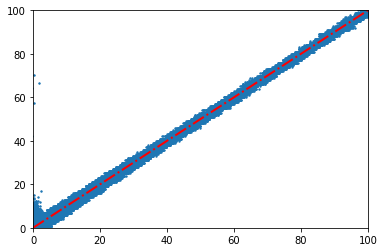

In [6]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()


## Scoring
Display training metrics (MSE and Pearson's correlation on the test data)

In [7]:
multinet.test_metrics

{'correlation': 0.8958310128894449, 'MSE': 0.18464281801867802}